In [14]:
import pandas as pd
import numpy as np
rd = pd.read_csv('C:/Users/mrame/Downloads/2001-05.csv')
rd.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,1/1/2001 11:00,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,8/5/2017 15:50,NaN,NaN,NaN
1,11042125,JA376558,12/16/2011 0:00,003XX W 64TH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,HOSPITAL BUILDING/GROUNDS,False,False,...,20.0,68.0,11,NaN,NaN,2011,8/5/2017 15:50,NaN,NaN,NaN
2,11042141,JA376559,5/16/2013 0:00,003XX W 64TH ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,HOSPITAL BUILDING/GROUNDS,False,False,...,20.0,68.0,11,NaN,NaN,2013,8/5/2017 15:50,NaN,NaN,NaN
3,11042183,JA376593,7/12/2001 0:01,024XX N LUNA AVE,266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,...,30.0,19.0,2,NaN,NaN,2001,8/5/2017 15:50,NaN,NaN,NaN
4,11042905,JA374476,1/1/2003 0:01,056XX S ARTESIAN AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,15.0,63.0,17,NaN,NaN,2003,10/27/2018 16:00,NaN,NaN,NaN


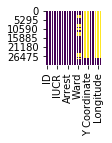

In [15]:
import matplotlib.pyplot as plot
import seaborn as sea
plot.figure(figsize=(1,1))
sea.heatmap(rd.isnull(), cbar = False, cmap = 'viridis')

In [16]:
rd = rd.dropna()
rd = rd.drop(['ID', 'Case Number', 'Block', 'IUCR','Domestic', 'Beat', 'District', 'Ward','X Coordinate', 'Y Coordinate','Updated On', 'FBI Code'], axis = 1)
pd.value_counts(rd['Primary Type'])[:10]

THEFT              1223
BATTERY             923
ASSAULT             511
NARCOTICS           109
HOMICIDE             89
BURGLARY             67
CRIMINAL DAMAGE      62
ROBBERY              60
SEX OFFENSE          10
GAMBLING             10
Name: Primary Type, dtype: int64

In [18]:
pd.value_counts(rd['Location Description'])[:10]

STREET                1545
OTHER                  344
RESIDENCE              312
SIDEWALK               291
APARTMENT              157
ALLEY                  153
RESTAURANT              55
DRUG STORE              27
SMALL RETAIL STORE      20
GROCERY FOOD STORE      17
Name: Location Description, dtype: int64

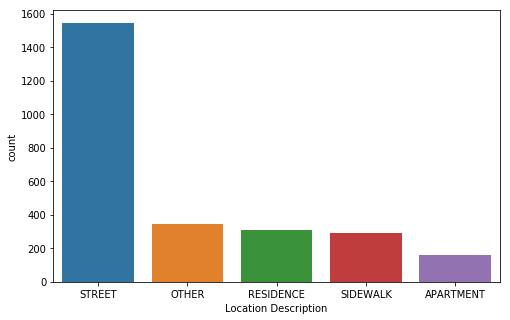

In [19]:
plot.figure(figsize = (8, 5))
sea.countplot(x= 'Location Description', data = rd, order = rd['Location Description'].value_counts().iloc[0:5].index)

In [32]:
import folium
import matplotlib.pyplot as plt
import seaborn as sea
c_m = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB Positron")
locs = rd.groupby('Community Area').first()
new_locs = locs.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]
new_locs.head()

,Latitude,Longitude,Location Description,Arrest
Community Area,,,,
1.0,42.012652,-87.673666,ALLEY,False
2.0,41.996328,-87.692280,RESIDENCE,True
3.0,41.970251,-87.654849,VACANT LOT,True
4.0,41.971725,-87.685363,OTHER,False
5.0,41.947240,-87.684633,STREET,False


In [33]:
for i in range(len(new_locs)):
    lat = new_locs.iloc[i][0]
    long = new_locs.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locs.index[i],
                               new_locs.iloc[i][-1],
                               new_locs.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = False).add_to(c_m)

In [34]:
c_m 

In [35]:
uniq_locs = rd['Location'].value_counts()
uniq_locs.index

Index(['(41.909307068, -87.80576669)', '(42.019399237, -87.675049485)',
       '(41.873807522, -87.69445629)', '(41.893962515, -87.636176148)',
       '(41.754592961, -87.741528537)', '(42.019450952, -87.680742064)',
       '(41.8032982, -87.653195042)', '(41.896664035, -87.629175344)',
       '(41.87178962, -87.633564301)', '(41.965911528, -87.65886264)',
       ...
       '(41.750685708, -87.719165721)', '(41.83083459, -87.685050125)',
       '(41.802684769, -87.65387638)', '(41.999693927, -87.680936618)',
       '(41.801100178, -87.687455112)', '(41.973737192, -87.668131872)',
       '(41.75429008, -87.642523729)', '(41.85255417, -87.704064357)',
       '(41.887725007, -87.711207606)', '(41.773991152, -87.66569064)'],
      dtype='object', length=2926)

In [36]:
crime_count = pd.DataFrame({"Raw_String" : uniq_locs.index, "ValueCount":uniq_locs})
crime_count.index = range(len(uniq_locs))
crime_count.head()

,Raw_String,ValueCount
0,"(41.909307068, -87.80576669)",19
1,"(42.019399237, -87.675049485)",14
2,"(41.873807522, -87.69445629)",5
3,"(41.893962515, -87.636176148)",5
4,"(41.754592961, -87.741528537)",5


In [37]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

In [38]:
crime_count['LocationCoord'] = crime_count['Raw_String'].apply(Location_extractor)
crime_count  = crime_count.drop('Raw_String', axis = 1)

In [40]:
crime_map = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=11,
                        tiles="CartoDB Positron")

for index in range(500):
    latitude = crime_count['LocationCoord'].iloc[index][0]
    longitude = crime_count['LocationCoord'].iloc[index][1]
    radius = crime_count['ValueCount'].iloc[index] / 45
    
    if crime_count['ValueCount'].iloc[index] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               crime_count['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [latitude, longitude], popup= popup_text,radius = radius, color = color, fill = True).add_to(crime_map)
    

In [41]:
crime_map

In [81]:
rdt = rd[rd['Primary Type'] == 'THEFT']

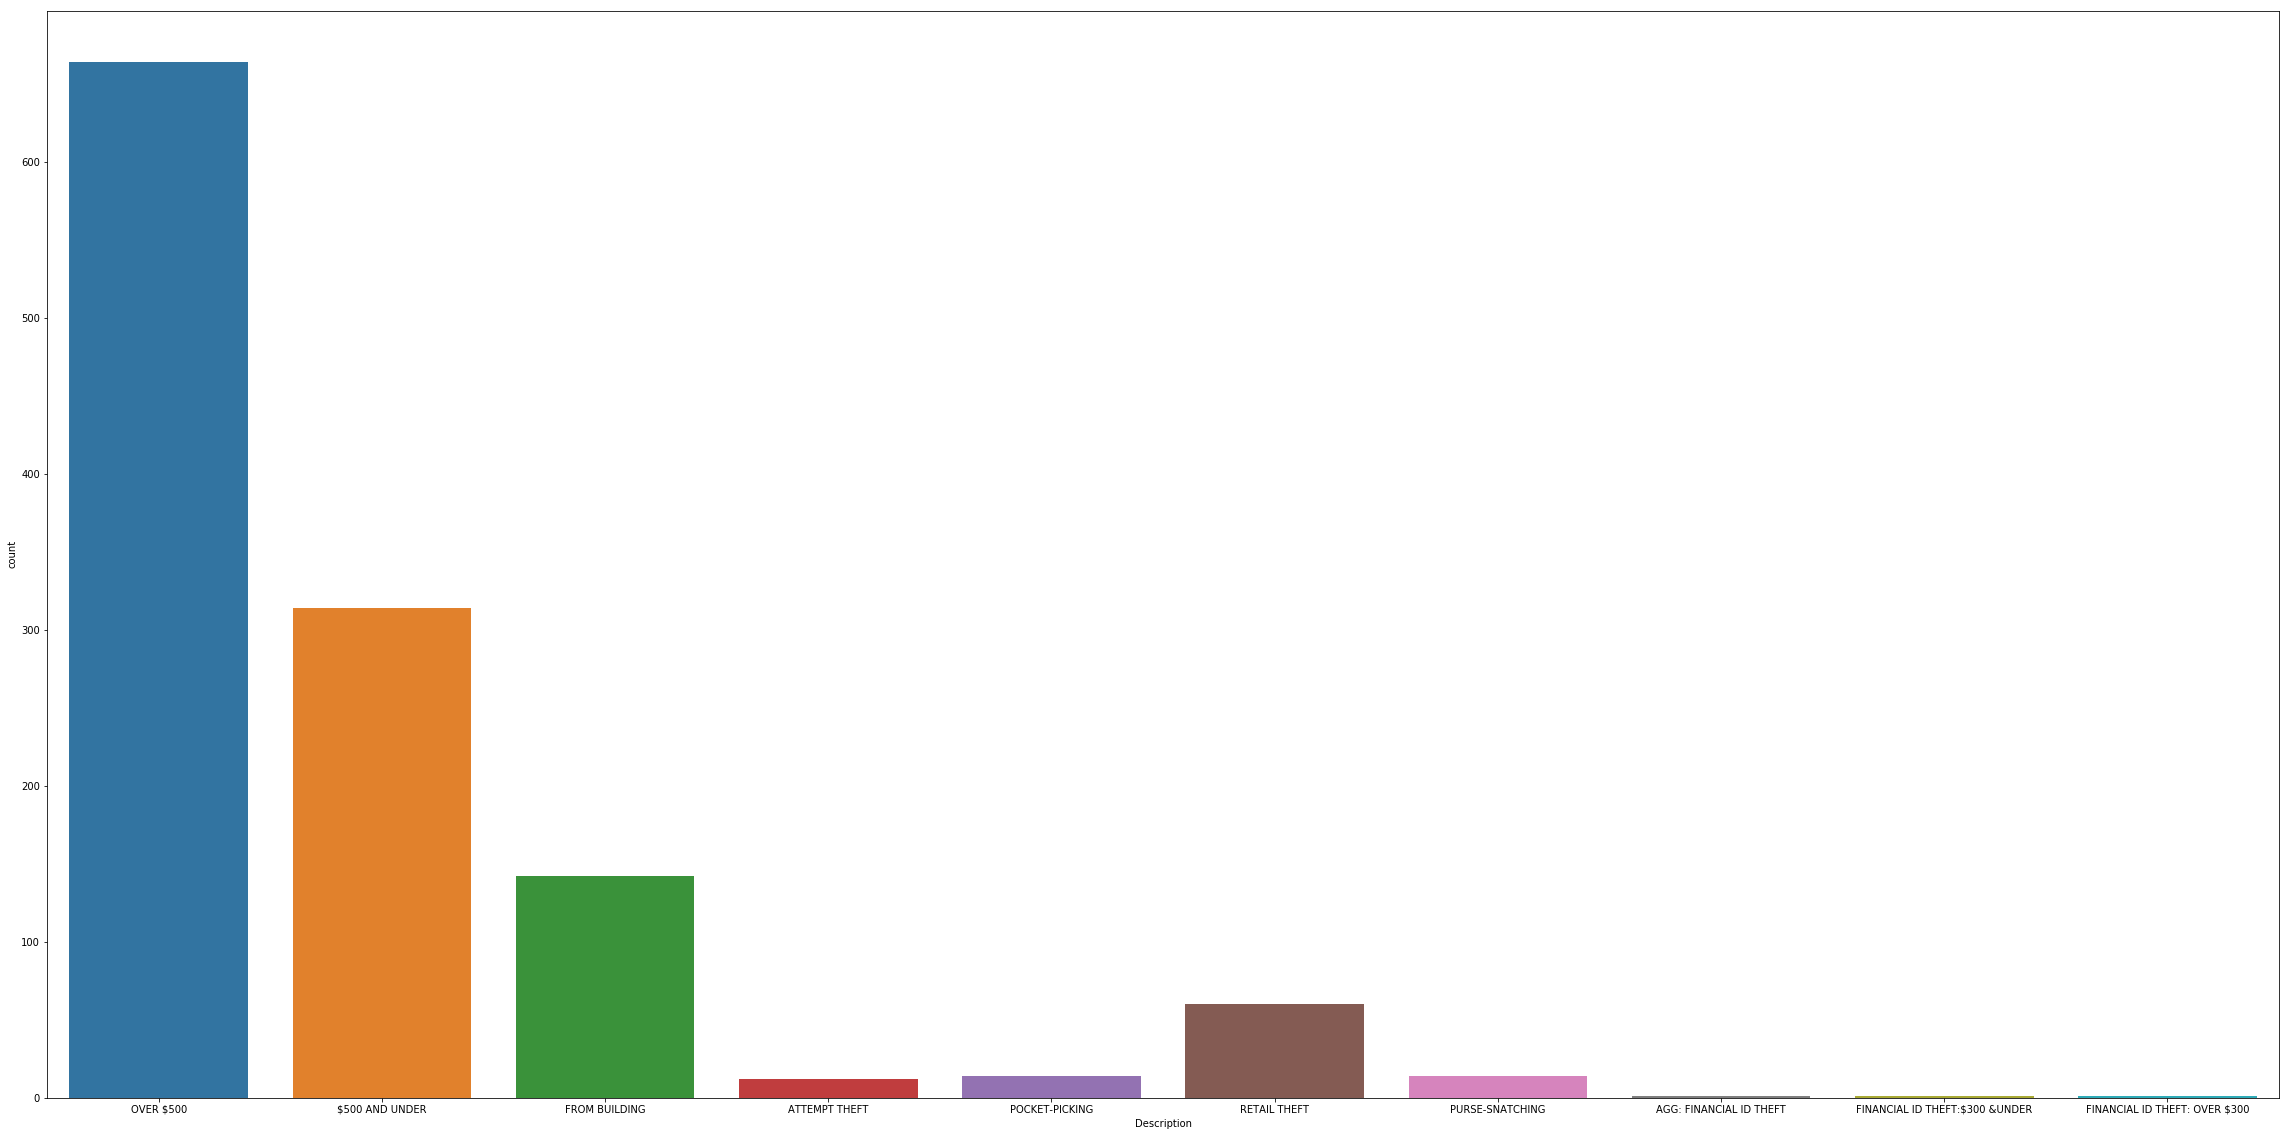

In [82]:
plot.figure(figsize = (40, 20))
sea.countplot(x = rdt['Description'])

In [83]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)
rdt_data.head()

,Counts,Description
0,664,OVER $500
1,314,$500 AND UNDER
2,142,FROM BUILDING
3,60,RETAIL THEFT
4,14,POCKET-PICKING


In [84]:
rdt['Date'] = pd.to_datetime(rdt['Date'])

C:\Users\mrame\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
rdt['Month'] = rdt['Date'].apply(lambda x : x.month)

C:\Users\mrame\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
theft_in_months = pd.DataFrame({"thefts" : rdt['Month'].value_counts(), "month" : rdt["Month"].value_counts().index}, index = range(12))

In [88]:
theft_in_months.fillna(0, inplace=True)
theft_in_months = theft_in_months.sort_values(['month'], ascending=[1])

In [89]:
theft_in_months.head()

,thefts,month
10,127.0,1
11,114.0,2
5,101.0,3
9,110.0,4
8,122.0,5


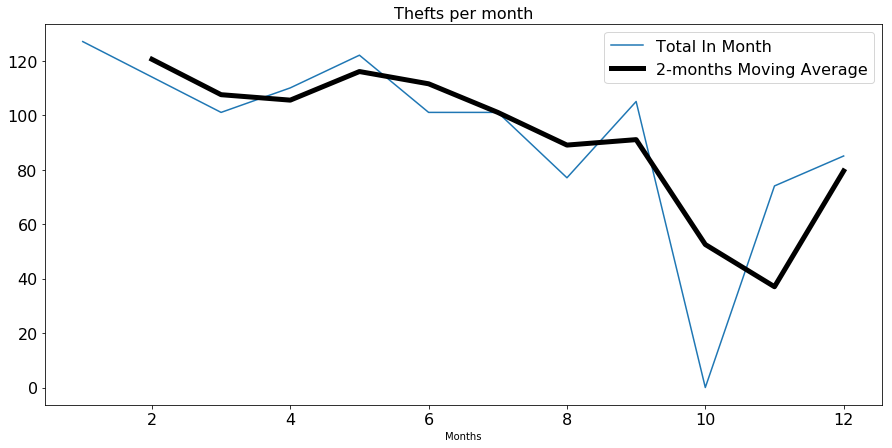

In [90]:
plt.figure(figsize = (15,7))
plt.plot(theft_in_months['month'],theft_in_months['thefts'], label = 'Total In Month')
plt.plot(theft_in_months['month'],theft_in_months['thefts'].rolling(window = 2).mean(),color='black', linewidth=5, label='2-months Moving Average' )

plt.title('Thefts per month', fontsize=16)
plt.xlabel('Months')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);

In [114]:
rdt = rd[rd['Primary Type'] == 'BATTERY']

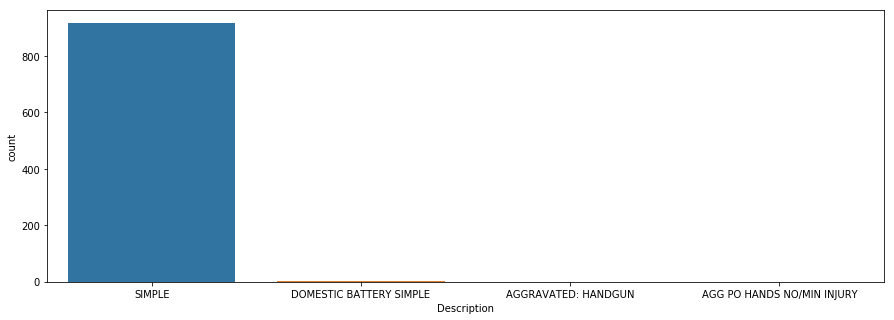

In [115]:
plot.figure(figsize = (15,5))
sea.countplot(x = rdt['Description'])

In [116]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)
rdt_data.head()

,Counts,Description
0,917,SIMPLE
1,4,DOMESTIC BATTERY SIMPLE
2,1,AGGRAVATED: HANDGUN
3,1,AGG PO HANDS NO/MIN INJURY


In [117]:
rdt['Date'] = pd.to_datetime(rdt['Date'])

C:\Users\mrame\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [118]:
rdt['Month'] = rdt['Date'].apply(lambda x : x.month)

C:\Users\mrame\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [119]:
battery_in_months = pd.DataFrame({"Battery" : rdt['Month'].value_counts(), "month" : rdt["Month"].value_counts().index}, index = range(12))

In [120]:
battery_in_months.fillna(0, inplace=True)
battery_in_months = battery_in_months.sort_values(['month'], ascending=[1])

In [121]:
battery_in_months.head()

,Battery,month
11,70.0,1
10,103.0,2
8,82.0,3
9,79.0,4
0,0.0,5


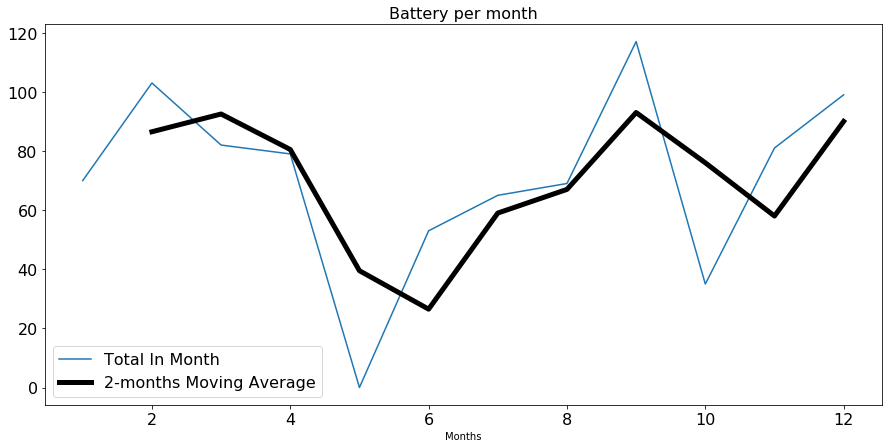

In [122]:
plt.figure(figsize = (15,7))
plt.plot(battery_in_months['month'],battery_in_months['Battery'], label = 'Total In Month')
plt.plot(battery_in_months['month'],battery_in_months['Battery'].rolling(window = 2).mean(),color='black', linewidth=5, label='2-months Moving Average' )

plt.title('Battery per month', fontsize=16)
plt.xlabel('Months')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);

In [123]:
rdt = rd[rd['Primary Type'] == 'HOMICIDE']

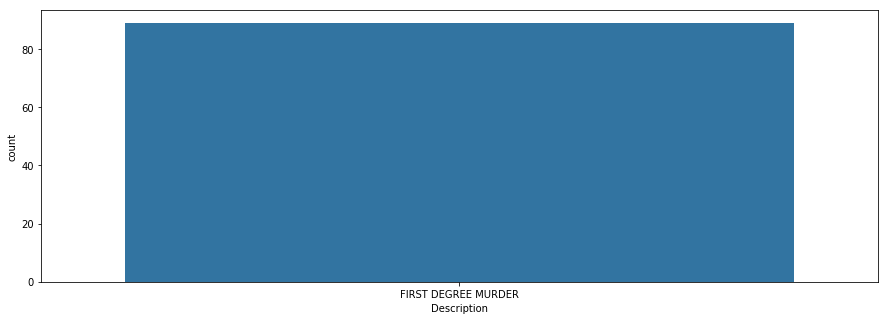

In [124]:
plot.figure(figsize = (15,5))
sea.countplot(x = rdt['Description'])

In [125]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)
rdt_data.head()

,Counts,Description
0,89,FIRST DEGREE MURDER


In [56]:
rdt = rd[rd['Primary Type'] == 'DECEPTIVE PRACTICE']

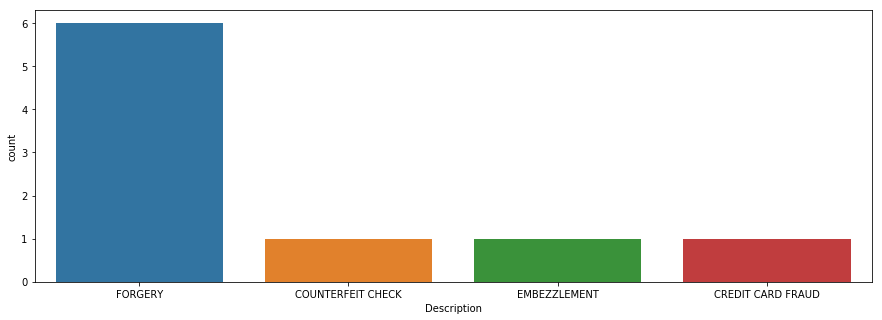

In [57]:
plot.figure(figsize = (15,5))
sea.countplot(x = rdt['Description'])

In [67]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)
rdt_data.head()

,Counts,Description
0,2,NON-AGGRAVATED
1,1,PREDATORY
2,1,AGGRAVATED: OTHER DANG WEAPON
3,1,AGGRAVATED: HANDGUN


In [62]:
rdt = rd[rd['Primary Type'] == 'CRIM SEXUAL ASSAULT']

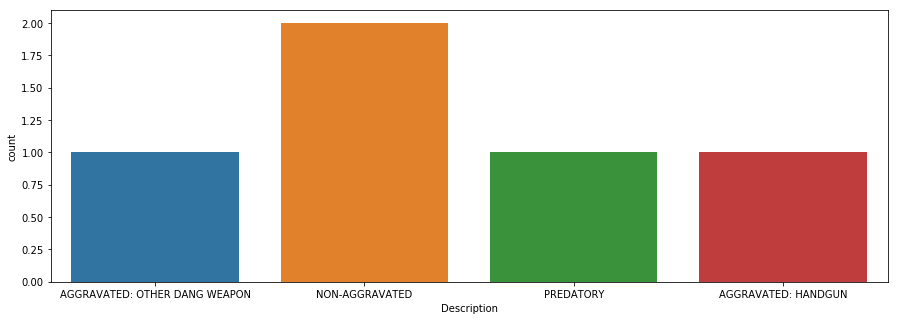

In [63]:
plot.figure(figsize = (15,5))
sea.countplot(x = rdt['Description'])

In [68]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)
rdt_data.head()

,Counts,Description
0,2,NON-AGGRAVATED
1,1,PREDATORY
2,1,AGGRAVATED: OTHER DANG WEAPON
3,1,AGGRAVATED: HANDGUN
